# Дерево решений, ID3

## Подготовка данных

Набор данных был взят с платформы kaggle, [классификация цены мобильного устройства](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data).

После преобразования итоговый набор содержит 8 столбцов, включая целевой признак (ценовой диапазон), 1500 записей, из которых 100 предназначены для построения дерева решения, 1400 для тестирования.

Ниже представлен набор данных.

In [1]:
import data_provider.data_provider as data_provider

In [2]:
train_data = data_provider.get_train_data()
train_data

,Мощность батареи (mAh),Частота процессора (gHz),Число ядер процессора (n),Число мегапикселей (n),Объём встроенной памяти (gb),Объём оперативной памяти (mb),Площадь экрана (cm^2),Ценовой диапазон
0,501.00 - 845.50,1.50 - 2.30,1.00 - 3.00,0.00 - 6.00,2.00 - 16.00,2209.50 - 3086.25,28.00 - 65.00,1
1,845.50 - 1233.00,0.50 - 0.70,3.00 - 4.00,6.00 - 14.00,48.00 - 64.00,2209.50 - 3086.25,28.00 - 65.00,2
2,501.00 - 845.50,0.50 - 0.70,4.00 - 7.00,6.00 - 14.00,32.00 - 48.00,2209.50 - 3086.25,5.00 - 28.00,2
3,501.00 - 845.50,2.30 - 3.00,4.00 - 7.00,6.00 - 14.00,2.00 - 16.00,2209.50 - 3086.25,65.00 - 132.00,2
4,1615.25 - 1998.00,0.70 - 1.50,1.00 - 3.00,21.00 - 38.00,32.00 - 48.00,1205.75 - 2209.50,5.00 - 28.00,1
...,...,...,...,...,...,...,...,...
95,501.00 - 845.50,2.30 - 3.00,7.00 - 8.00,0.00 - 6.00,2.00 - 16.00,258.00 - 1205.75,28.00 - 65.00,0
96,501.00 - 845.50,0.70 - 1.50,4.00 - 7.00,0.00 - 6.00,32.00 - 48.00,1205.75 - 2209.50,5.00 - 28.00,1
97,1615.25 - 1998.00,1.50 - 2.30,4.00 - 7.00,14.00 - 21.00,16.00 - 32.00,2209.50 - 3086.25,65.00 - 132.00,3
98,1615.25 - 1998.00,2.30 - 3.00,4.00 - 7.00,14.00 - 21.00,32.00 - 48.00,2209.50 - 3086.25,5.00 - 28.00,3


Изначально все признаки имели числовые значения, но алгоритм ID3 требует, чтобы значения были категориальными, поэтому все признаки были переведены в диапазоны. Всего диапазонов 4 для каждого признака, они подобраны таким образом, чтобы в каждый диапазон входило примерно 25% значений признака.

Ценовой диапазон в оригинальном наборе данных изначально имел всего 4 значения ['0', '1', '2', '3']. Чем больше значение, тем дороже мобильное устройство.

In [3]:
data_provider.print_unique_column_values()

Мощность батареи (mAh)
['501.00 - 845.50',
 '845.50 - 1233.00',
 '1233.00 - 1615.25',
 '1615.25 - 1998.00']

Частота процессора (gHz)
['0.50 - 0.70', '0.70 - 1.50', '1.50 - 2.30', '2.30 - 3.00']

Число ядер процессора (n)
['1.00 - 3.00', '3.00 - 4.00', '4.00 - 7.00', '7.00 - 8.00']

Число мегапикселей (n)
['0.00 - 6.00', '6.00 - 14.00', '14.00 - 21.00', '21.00 - 38.00']

Объём встроенной памяти (gb)
['2.00 - 16.00', '16.00 - 32.00', '32.00 - 48.00', '48.00 - 64.00']

Объём оперативной памяти (mb)
['258.00 - 1205.75',
 '1205.75 - 2209.50',
 '2209.50 - 3086.25',
 '3086.25 - 3998.00']

Площадь экрана (cm^2)
['5.00 - 28.00', '28.00 - 65.00', '65.00 - 132.00', '132.00 - 342.00']

Ценовой диапазон
['0', '1', '2', '3']



## Построение дерева решений

In [4]:
from decision_tree.decision_tree_id3 import id3
from IPython.display import Image

In [5]:
tree = id3(train_data, 'Ценовой диапазон')

In [6]:
digraph = tree.get_digraph()
digraph.render('digraph/tree')

'digraph\\tree.png'

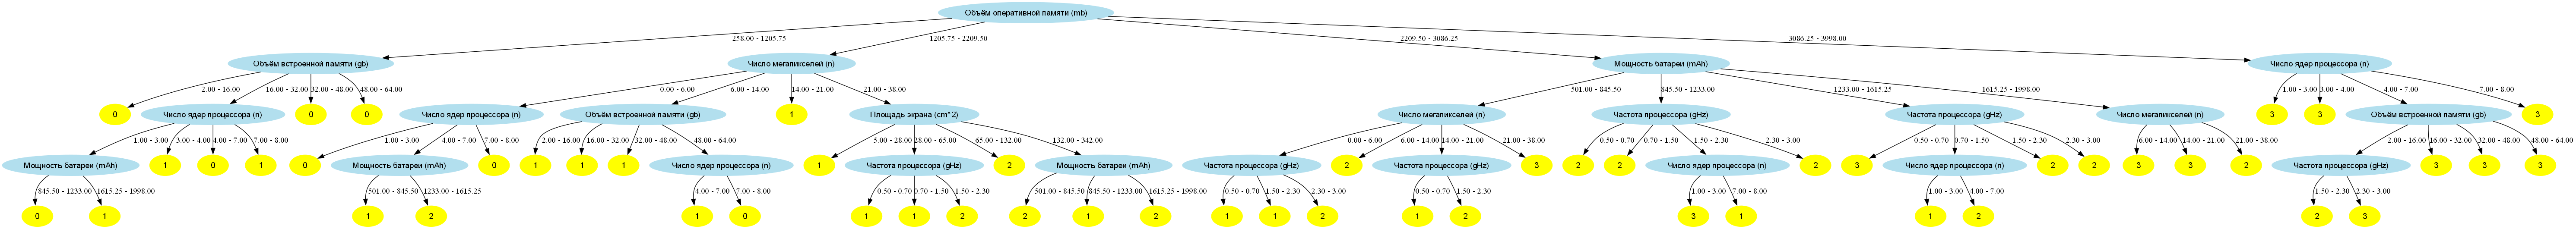

In [7]:
display(Image('digraph/tree.png'))

Дерево получилось чересчур широким для просмотра.

[Здесь удобнее просматривать](https://drive.google.com/file/d/1yjTt6CqxqilHOn8P2t1Yt6tNqjZHn1B1/view?usp=sharing), можно приближать и перемещать.

In [8]:
leaf_number = tree.get_leaf_number()
max_leaf_number = train_data.shape[0]

print(f'Число вершин-листьев - {leaf_number}.')
print(f'Максимальное дерево содержит вершин-листьев (число строк в таблице) - {max_leaf_number}.')
print(f'Эффективность сжатия - {(max_leaf_number - leaf_number) / max_leaf_number * 100}%.')

Число вершин-листьев - 54.
Максимальное дерево содержит вершин-листьев (число строк в таблице) - 100.
Эффективность сжатия - 46.0%.


## Тестирование дерева решений

In [9]:
from decision_tree.decision_tree_test import test_decision_tree

Проверим дерево решений на какой-нибудь записи, которое участвовало в его построении.

In [10]:
record = dict(train_data.iloc[0])
record

{'Мощность батареи (mAh)': '501.00 - 845.50',
 'Частота процессора (gHz)': '1.50 - 2.30',
 'Число ядер процессора (n)': '1.00 - 3.00',
 'Число мегапикселей (n)': '0.00 - 6.00',
 'Объём встроенной памяти (gb)': '2.00 - 16.00',
 'Объём оперативной памяти (mb)': '2209.50 - 3086.25',
 'Площадь экрана (cm^2)': '28.00 - 65.00',
 'Ценовой диапазон': '1'}

In [11]:
tree.predict(record)

'1'

Дерево верно предсказало, но здесь у неё не было никакого права на ошибку.

Теперь протестируем на записях, которые не участвовали в построении дерева.

In [12]:
test_data = data_provider.get_test_data()

tests = test_data.shape[0]
accept_tests, undefineds = test_decision_tree(tree, test_data, 'Ценовой диапазон')

In [13]:
print(f'Число пройденных тестов - {accept_tests}/{tests}.')
print(f'Число неопределённых тестов - {undefineds}.')
print(f'Точность предсказания - {"{:.2f}".format(accept_tests / tests * 100)}%.')

Число пройденных тестов - 857/1400.
Число неопределённых тестов - 131.
Точность предсказания - 61.21%.


Неопределённые тесты это такие тесты, на которые дерево не смогло дать никакого ответа. То есть попалась комбинация значений признаков, которых не было в обучающей выборке.

In [14]:
test_data['Ценовой диапазон'].value_counts(normalize=True).sort_index().mul(100).round(2).astype(str) + '%'

Ценовой диапазон
0    24.14%
1    24.71%
2    25.79%
3    25.36%
Name: proportion, dtype: object

Учитывая, что значений ценового диапазона примерно одинаковое количество, то точность предсказания дерева решений более 60% является достаточно неплохим результатом. Точность при случайном угадывании составляла бы примерно 25%.

## Свойства дерева решений

Дерево строится таким образом, что чем больше значение текущей вершины (признака), тем правее будет потомок, который будет соответствовать значению.

На изображении ниже, некоторые диапазоны выделены определённым цветами. Диапазоны идут слева направо в порядке возрастания.

<p align="center">
 <img width="800px" src="images/tree_part.png" alt="tree_part"/>
</p>

Если посмотреть на все листья дерева, то можно заметить, что ближе к левой части дерева листья чаще всего имеют маленькие значения (0, 1), а ближе к правой части большинство имеют большие значения (2, 3).

Это можно объяснить тем, что при увеличении значений характеристик мобильного устройства его цена тоже увеличивается, что вполне логично.

По самому дереву также можно сказать, что **цена большего всего зависит от объёма оперативной памяти**. От остальных признаков цена уже не так сильно зависит.

Посмотрим какое среднее значение принимает ценовой диапазон при различных значений признаков.

In [15]:
import matplotlib.pyplot as plt
from pprint import pprint

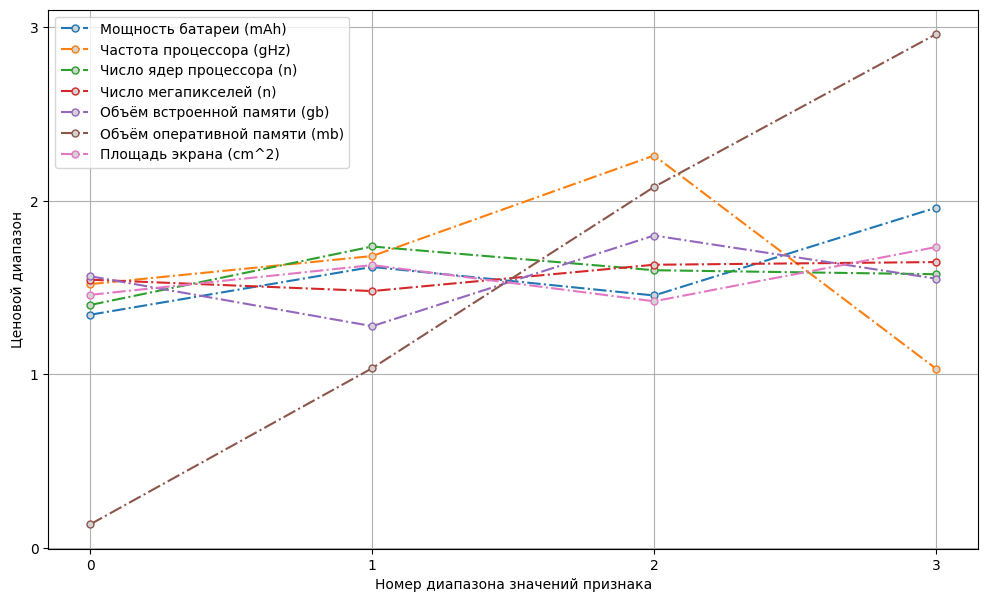

In [18]:
price_range_mean_values = data_provider.get_price_range_mean_values()
ranges_ = range(0, 4)

plt.figure(figsize=(12, 7))

for feature, price_range_mean_values in price_range_mean_values:
    plt.plot(ranges_, price_range_mean_values, label=feature, ls='-.', marker='.', ms=10, mfc='lightgray')

plt.xlabel('Номер диапазона значений признака')
plt.ylabel('Ценовой диапазон')

plt.xticks(ranges_)
plt.yticks(ranges_)

plt.legend()
plt.grid(True)

Ещё раз напомним, что в каждый диапазон входит примерно 25% значений признаков. В 0 диапазон входит первые 25% значений, в 3 последние 25%, при этом значения находятся в порядке возрастания.

In [17]:
print('Мощность батареи (mAh)')
pprint(sorted(list(train_data['Мощность батареи (mAh)'].unique()), key=lambda x: float(x.split(' - ')[0])))

Мощность батареи (mAh)
['501.00 - 845.50',
 '845.50 - 1233.00',
 '1233.00 - 1615.25',
 '1615.25 - 1998.00']


Из графиков можно сделать тот же вывод, что и на основе изображения дерева.